In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('/content/Employee.csv')

In [75]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [76]:
df.shape

(4653, 9)

In [77]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [79]:
# Yesrs worked in the Organization
df['YearsSinceJoin'] = 2024 - df['JoiningYear']

In [80]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,YearsSinceJoin
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,7
1,Bachelors,2013,Pune,1,28,Female,No,3,1,11
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,10
3,Masters,2016,Bangalore,3,27,Male,No,5,1,8
4,Masters,2017,Pune,3,24,Male,Yes,2,1,7


# Visualization

<Axes: >

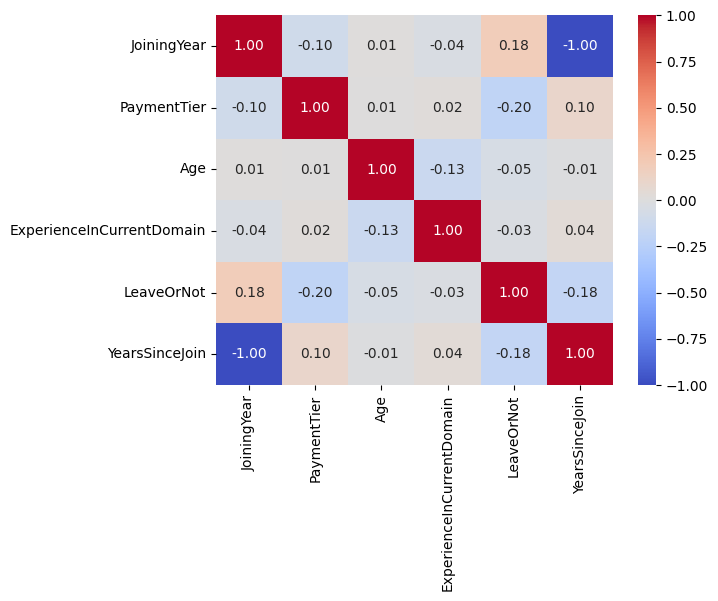

In [81]:
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt = '.2f', cmap = 'coolwarm')

No such correlation found

In [82]:
df_cat = df.select_dtypes(include= ['object'])
df_cat

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes
...,...,...,...,...
4648,Bachelors,Bangalore,Female,No
4649,Masters,Pune,Male,No
4650,Masters,New Delhi,Male,No
4651,Bachelors,Bangalore,Male,Yes


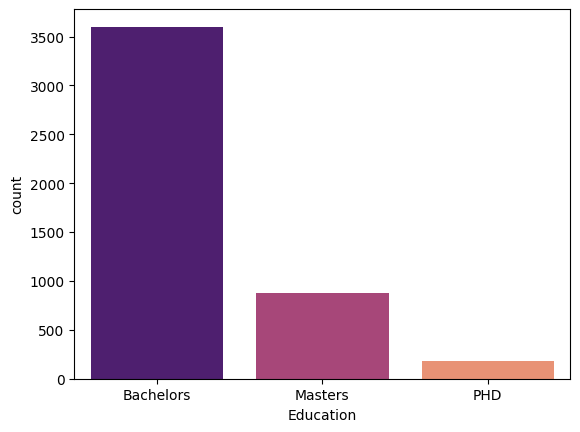

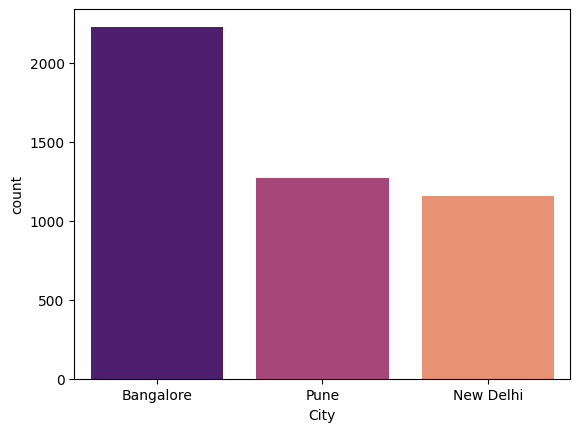

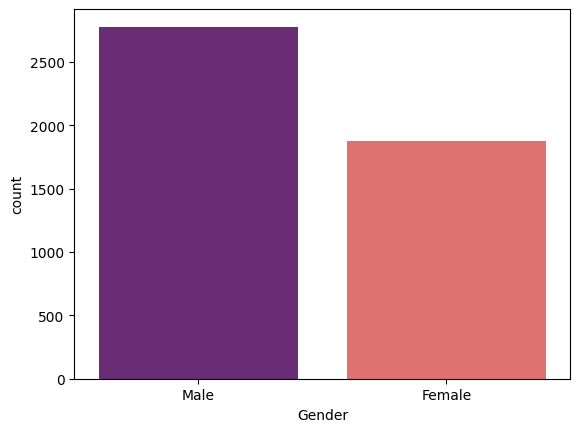

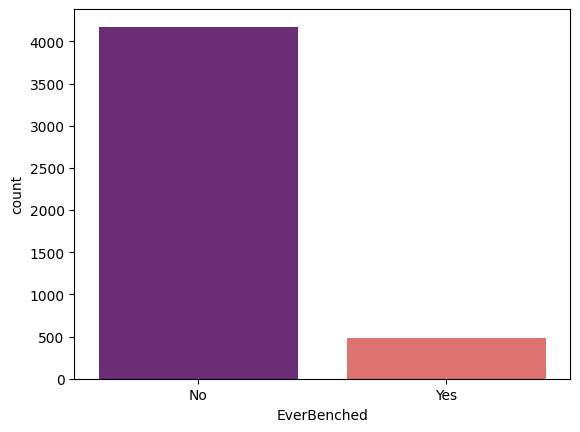

In [83]:
for col in df_cat:
    sns.countplot(x = col, data = df, palette = 'magma')
    plt.show()

<Axes: xlabel='LeaveOrNot', ylabel='count'>

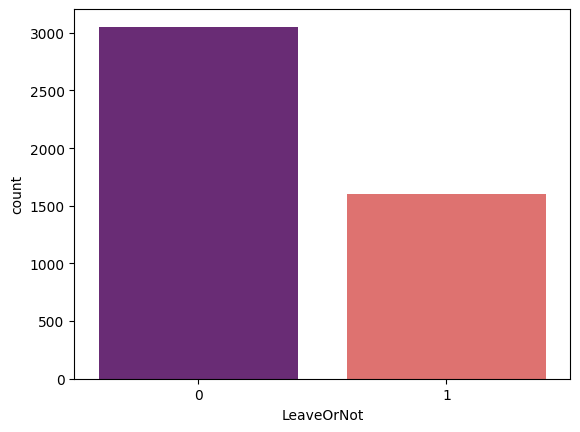

In [84]:
sns.countplot(x = 'LeaveOrNot', data = df, palette = 'magma')

In [85]:
df_num = ['Age','ExperienceInCurrentDomain','YearsSinceJoin']
df['PaymentTier']=df['PaymentTier'].astype('category')
df['LeaveOrNot']=df['LeaveOrNot'].astype('category')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  4653 non-null   object  
 1   JoiningYear                4653 non-null   int64   
 2   City                       4653 non-null   object  
 3   PaymentTier                4653 non-null   category
 4   Age                        4653 non-null   int64   
 5   Gender                     4653 non-null   object  
 6   EverBenched                4653 non-null   object  
 7   ExperienceInCurrentDomain  4653 non-null   int64   
 8   LeaveOrNot                 4653 non-null   category
 9   YearsSinceJoin             4653 non-null   int64   
dtypes: category(2), int64(4), object(4)
memory usage: 300.3+ KB


# Data Preprocessing

In [87]:
# since we have calculated the no of years since joining , we can drop the Joining year column
df.drop('JoiningYear',axis = 1, inplace = True)

In [88]:
df.head()

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,YearsSinceJoin
0,Bachelors,Bangalore,3,34,Male,No,0,0,7
1,Bachelors,Pune,1,28,Female,No,3,1,11
2,Bachelors,New Delhi,3,38,Female,No,2,0,10
3,Masters,Bangalore,3,27,Male,No,5,1,8
4,Masters,Pune,3,24,Male,Yes,2,1,7


In [89]:
x = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot']

In [90]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  4653 non-null   object  
 1   City                       4653 non-null   object  
 2   PaymentTier                4653 non-null   category
 3   Age                        4653 non-null   int64   
 4   Gender                     4653 non-null   object  
 5   EverBenched                4653 non-null   object  
 6   ExperienceInCurrentDomain  4653 non-null   int64   
 7   YearsSinceJoin             4653 non-null   int64   
dtypes: category(1), int64(3), object(4)
memory usage: 259.3+ KB


In [91]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [92]:
scale = StandardScaler()
le = LabelEncoder()

In [93]:
x.head()


,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,YearsSinceJoin
0,Bachelors,Bangalore,3,34,Male,No,0,7
1,Bachelors,Pune,1,28,Female,No,3,11
2,Bachelors,New Delhi,3,38,Female,No,2,10
3,Masters,Bangalore,3,27,Male,No,5,8
4,Masters,Pune,3,24,Male,Yes,2,7


In [94]:
df_cat  = x.select_dtypes(include = ['object','category'])
df_num = x.select_dtypes(exclude = ['object','category'])
print(df_cat.columns)
print(df_num.columns)

Index(['Education', 'City', 'PaymentTier', 'Gender', 'EverBenched'], dtype='object')
Index(['Age', 'ExperienceInCurrentDomain', 'YearsSinceJoin'], dtype='object')


In [95]:
for col in df_cat:
    x[col] = le.fit_transform(x[col])

In [96]:
for col in df_num:
    x[col] = scale.fit_transform(x[col].values.reshape(-1,1))

In [97]:
x.head(5)

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,YearsSinceJoin
0,0,0,2,0.954645,1,0,-1.864901,-1.039638
1,0,2,0,-0.288732,0,0,0.060554,1.107233
2,0,1,2,1.783563,0,0,-0.581264,0.570515
3,1,0,2,-0.495961,1,0,1.344191,-0.502921
4,1,2,2,-1.117650,1,1,-0.581264,-1.039638


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3257, 8)
(1396, 8)
(3257,)
(1396,)


In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc = RandomForestClassifier(n_estimators = 100)

In [102]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [103]:
#training accuracy
rfc.score(x_train, y_train)

0.9312250537304267

In [104]:
y_pred = rfc.predict(x_test)

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [106]:
accuracy_score(y_test, y_pred)

0.8524355300859598

In [107]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[845  75]
 [131 345]]


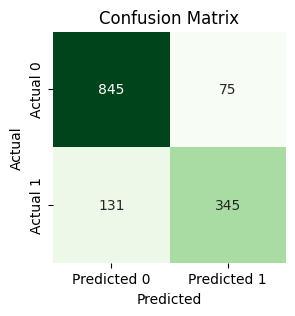

In [108]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       920
           1       0.82      0.72      0.77       476

    accuracy                           0.85      1396
   macro avg       0.84      0.82      0.83      1396
weighted avg       0.85      0.85      0.85      1396




 # Final Conclusion/Interpretation

# Based on the analysis and the Random Forest Classifier model, we can conclude that:

1. The model achieves a good accuracy in predicting whether an employee will leave or not.

2. The confusion matrix and classification report provide insights into the model's performance.
   * It shows the number of true positives, true negatives, false positives, and false negatives.
   * It also highlights the model's precision, recall, and F1-score for each class (leave or not leave).

 3. Feature importance analysis from the Random Forest Classifier can be used to identify the most influential factors in employee attrition.
   * For instance, Payment Tier, Experience in Current Domain, and Age might be significant factors in determining whether employees are likely to leave.

 4.  The model can be further improved by exploring different feature engineering techniques and model hyperparameter tuning.

 5.  The results can be used to develop strategies for employee retention. The identified key factors could be addressed to minimize employee turnover and improve employee satisfaction.

 In essence, this analysis provides a valuable tool for organizations to better understand employee attrition patterns and make informed decisions for retention.
